# Contents

This notebook contains several SQL queries to synthetic and fictitious data. I have organized the notebook into 5 logical sections:

1. Sales Data
2. Customer Data
3. Product Data
4. The Effect of Holidays
5. Customer Model

Please refer to the Readme file in the corresponding GitHub repository for context about this project.

# Included Modules and Packages

Code cell containing included modules and packages

In [51]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

import psycopg2

# Supporting code

Code cells containing supporting code.

In [4]:
# Function to run a select query and return rows in a pandas dataframe
# Pandas puts all numeric values from postgres to float
# If it will fit in an integer, change it to integer


def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)

In [5]:
# Connect to Postgres

connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

# Create a cursor for the connection

cursor = connection.cursor()

# Sales Data Queries

### Total Sales as a Dollar Amount

In [6]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sum(total_amount) as total_sales 
from sales

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_sales
0,98739408


### Total Sales as a Dollar Amount by Store

In [7]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store, 
        sum(sa.total_amount) as total_sales
from stores as s 
     join sales as sa 
         on s.store_id = sa.store_id
group by s.city
order by store

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,total_sales
0,Berkeley,25041060
1,Dallas,19408260
2,Miami,17692404
3,Nashville,14573172
4,Seattle,22024512


### Total Sales as a Dollar Amount by Month

In [8]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(month from sale_date) as moy, 
        to_char(sale_date, 'Month') as month, 
        sum(total_amount) as total_sales
from sales
group by moy, month
order by moy

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,moy,month,total_sales
0,1,January,7803828
1,2,February,7574280
2,3,March,8779620
3,4,April,8251284
4,5,May,7977840
5,6,June,8124108
6,7,July,7993044
7,8,August,9029808
8,9,September,7578960
9,10,October,8895108


### Total Sales as a Dollar Amount by Store and by Month

In [9]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
        extract(month from sa.sale_date) as moy,
        to_char(sa.sale_date, 'Month') as month,
        sum(sa.total_amount) as total_sales
from stores as s
    join sales as sa
        on s.store_id = sa.store_id
group by store, moy, month
order by store, moy

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,moy,month,total_sales
0,Berkeley,1,January,1988904
1,Berkeley,2,February,1930272
2,Berkeley,3,March,2224500
3,Berkeley,4,April,2092056
4,Berkeley,5,May,2019264
5,Berkeley,6,June,2065140
6,Berkeley,7,July,2034708
7,Berkeley,8,August,2286732
8,Berkeley,9,September,1922256
9,Berkeley,10,October,2248008


### Total Sales as a Dollar Amount by Day of Week

In [10]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(dow from sale_date) as dow, 
        to_char(sale_date, 'Day') as day, 
        sum(total_amount) as total_sales
from sales
group by dow, day
order by dow

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,dow,day,total_sales
0,0,Sunday,18589068
1,1,Monday,13167720
2,2,Tuesday,6895332
3,3,Wednesday,13952556
4,4,Thursday,13834644
5,5,Friday,12878628
6,6,Saturday,19421460


### Total Sales as a Dollar Amount by Store and Day of Week

In [11]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
        extract(dow from sa.sale_date) as dow,
        to_char(sa.sale_date, 'Day') as day,
        sum(sa.total_amount) as total_sales
from stores as s
    join sales as sa
        on s.store_id = sa.store_id
group by store, dow, day
order by store, dow

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,dow,day,total_sales
0,Berkeley,0,Sunday,4694640
1,Berkeley,1,Monday,3340116
2,Berkeley,2,Tuesday,1752036
3,Berkeley,3,Wednesday,3546144
4,Berkeley,4,Thursday,3507660
5,Berkeley,5,Friday,3273240
6,Berkeley,6,Saturday,4927224
7,Dallas,0,Sunday,3650748
8,Dallas,1,Monday,2602980
9,Dallas,2,Tuesday,1352760


### Total Number of Sales

In [12]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select count(distinct store_id || '-' || sale_id) as total_txns
from sales

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_txns
0,1537617


### Total Number of Sales by Store

In [13]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store, 
        count(distinct sa.store_id || '-' || sa.sale_id) as total_txns
from stores as s 
     join sales as sa 
         on s.store_id = sa.store_id
group by s.city
order by store

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,total_txns
0,Berkeley,390375
1,Dallas,302120
2,Miami,275074
3,Nashville,227721
4,Seattle,342327


### Average Dollar Amount per Sale

In [14]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select count(distinct store_id || '-' || sale_id) as total_txns, 
        sum(total_amount) as total_sales, 
        (sum(total_amount) / count(distinct store_id || '-' || sale_id)) as avg_per_txn
from sales

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_txns,total_sales,avg_per_txn
0,1537617,98739408,64.215866


### Average Dollar Amount per Sale by Store

In [15]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store, 
        count(distinct sa.store_id || '-' || sa.sale_id) as total_txns, 
        sum(sa.total_amount) as total_sales, 
        (sum(sa.total_amount) / count(distinct sa.store_id || '-' || sa.sale_id)) as avg_per_txn 
from stores as s 
     join sales as sa 
         on s.store_id = sa.store_id
group by s.city
order by store

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,total_txns,total_sales,avg_per_txn
0,Berkeley,390375,25041060,64.146167
1,Dallas,302120,19408260,64.240236
2,Miami,275074,17692404,64.318707
3,Nashville,227721,14573172,63.995732
4,Seattle,342327,22024512,64.337642


# Sales Data Visualization

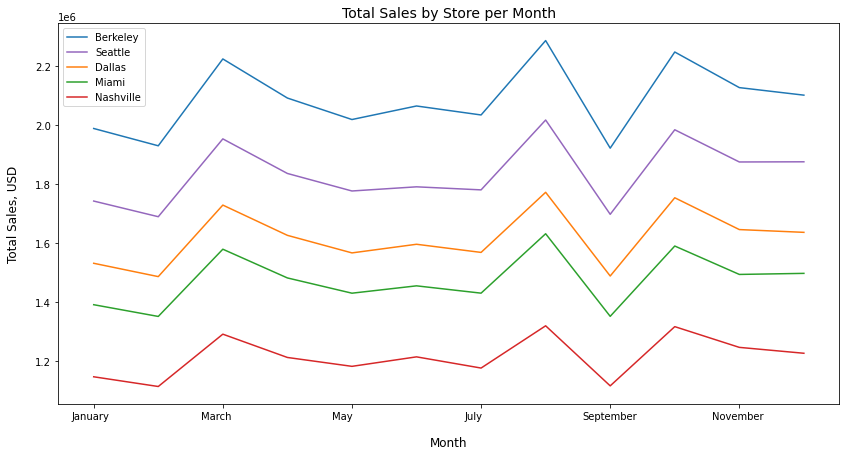

In [16]:
# Store the below query as df

rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
        extract(month from sa.sale_date) as moy,
        to_char(sa.sale_date, 'Month') as month,
        sum(sa.total_amount) as total_sales
from stores as s
    join sales as sa
        on s.store_id = sa.store_id
group by store, moy, month
order by store, moy

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

# Plot the results of the query
fig, ax = plt.subplots()
fig = df.groupby(["month", "store"], sort=False)["total_sales"].sum().unstack(level=1).plot(figsize=(14,7), ax=ax)

# Change order of legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 4, 1, 2, 3]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

# Add titles and axes labels
plt.title("Total Sales by Store per Month", fontsize=14)
ax.set_ylabel("Total Sales, USD", labelpad=15, fontsize=12)
ax.set_xlabel("Month", labelpad=15, fontsize=12);

# Customer Data Queries

### Total Number of Customers

In [17]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select count(customer_id) as total_customers
from customers

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_customers
0,31082


### Total Number of Customers by Store

In [18]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
        count(cu.customer_id) as total_customers
from stores as s
    join customers as cu
        on s.store_id = cu.closest_store_id
group by store
order by store
        
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,total_customers
0,Berkeley,8138
1,Dallas,6359
2,Miami,5725
3,Nashville,3646
4,Seattle,7214


### Total Number of Customers by Distance from Store

In [19]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
        cu.distance as distance,
        count(cu.customer_id) as total_customers
from stores as s
    join customers as cu
        on s.store_id = cu.closest_store_id
group by store, distance
order by distance
        
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,distance,total_customers
0,Seattle,1,593
1,Dallas,1,583
2,Nashville,1,175
3,Miami,1,648
4,Berkeley,1,791
...,...,...,...
116,Nashville,25,25
117,Miami,25,1
118,Berkeley,25,29
119,Seattle,25,31


### Customers with 0 Purchases

In [20]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select cu.first_name,
        cu.last_name
from customers as cu
    left join sales as sa
        on cu.customer_id = sa.customer_id
where sa.customer_id is null
order by cu.last_name, cu.first_name 
        
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,first_name,last_name
0,Tracy,Agott
1,Daniella,Arnke
2,Hyacintha,Assandri
3,Felice,Borman
4,Domini,Breit
5,Jacenta,Butterick
6,Marysa,Camillo
7,Lilas,Dukelow
8,Corinna,Dukesbury
9,Lorianna,Ellaway


### Percentage of Customers per Population by Zip Code

In [21]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select cu.zip,
        zc.population as pop,
        count(cu.customer_id) as total_customers,
        (count(cu.customer_id) / zc.population * 100) as pct_total
from customers as cu
    join zip_codes as zc
        on cu.zip = zc.zip
group by cu.zip, pop
order by pct_total desc
        
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,zip,pop,total_customers,pct_total
0,98164,155,2,1.290323
1,98050,552,6,1.086957
2,33109,475,5,1.052632
3,94613,861,9,1.045296
4,37240,778,8,1.028278
...,...,...,...,...
545,33033,58224,1,0.001718
546,75067,67487,1,0.001482
547,75035,69802,1,0.001433
548,94565,96081,1,0.001041


### Percentage of Customers per Population by City

In [22]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select ci.city as city,
        ci.state as state,
        ci.population as pop,
        count(cu.customer_id) as total_customers,
        (count(cu.customer_id) / ci.population * 100) as pct_total
from cities as ci
    join customers as cu
        on ci.city = cu.city and ci.state = cu.state
group by ci.city, ci.state
order by pct_total desc
        
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,city,state,pop,total_customers,pct_total
0,Preston,WA,552,6,1.086957
1,Indianola,WA,1363,14,1.027146
2,Stinson Beach,CA,689,7,1.015965
3,Medina,WA,3260,33,1.012270
4,Suquamish,WA,3071,31,1.009443
...,...,...,...,...,...
193,Murfreesboro,TN,186354,4,0.002146
194,Wylie,TX,56764,1,0.001762
195,Pleasanton,CA,82226,1,0.001216
196,Frisco,TX,172448,2,0.001160


# Customer Data Visualization

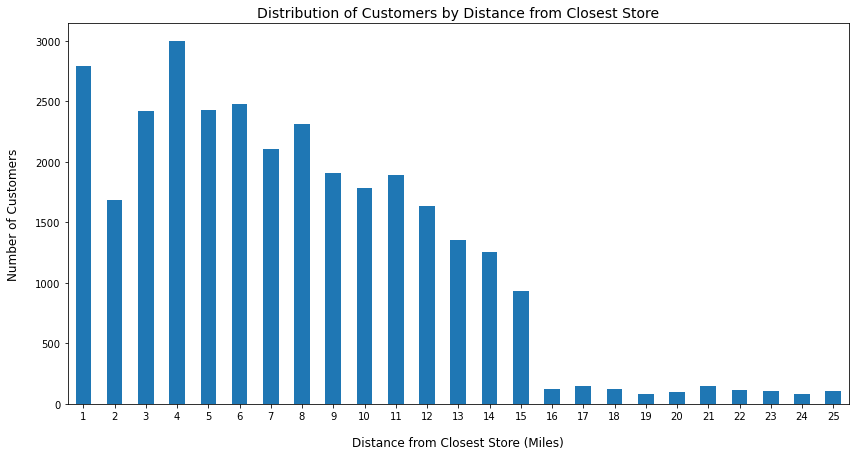

In [24]:
# Store the results of the below query as df

rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
        cu.distance as distance,
        count(cu.customer_id) as total_customers
from stores as s
    join customers as cu
        on s.store_id = cu.closest_store_id
group by store, distance
order by distance
        
"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

# Plot the results of the above query
fig, ax = plt.subplots()
df.groupby("distance")["total_customers"].sum().plot(kind="bar", figsize=(14,7))

# Add titles and axes labels
plt.title("Distribution of Customers by Distance from Closest Store", fontsize=14)
ax.set_ylabel("Number of Customers", labelpad=15, fontsize=12)
ax.set_xlabel("Distance from Closest Store (Miles)", labelpad=15, fontsize=12)
plt.xticks(rotation=0);

# Product Data Queries

### Total Number of Meals Purchased

In [25]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sum(quantity) as total_meals
from line_items

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_meals
0,8228284


### Total Number of Meals Purchased by Meal

In [26]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select p.description as product,
       sum(l.quantity) as total_quantity_sold
from line_items as l
     join products as p
         on l.product_id = p.product_id
group by product
order by product

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,product,total_quantity_sold
0,Brocolli Stir Fry,913984
1,Chicken Salad,228561
2,Curry Chicken,1368884
3,Eggplant Lasagna,1599058
4,Pistachio Salmon,1828778
5,Spinach Orzo,456769
6,Teriyaki Chicken,1145013
7,Tilapia Piccata,687237


### Total Number of Meals Purchased by Store and by Meal

In [27]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
        p.description as product,
        sum(l.quantity) as total_quantity_sold
from stores as s
    join sales as sa
        on s.store_id = sa.store_id
    join line_items as l
        on sa.store_id = l.store_id and sa.sale_id = l.sale_id
    join products as p
        on l.product_id = p.product_id
group by store, product
order by store, product

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,product,total_quantity_sold
0,Berkeley,Brocolli Stir Fry,232038
1,Berkeley,Chicken Salad,57719
2,Berkeley,Curry Chicken,346508
3,Berkeley,Eggplant Lasagna,405637
4,Berkeley,Pistachio Salmon,464274
5,Berkeley,Spinach Orzo,115469
6,Berkeley,Teriyaki Chicken,290858
7,Berkeley,Tilapia Piccata,174252
8,Dallas,Brocolli Stir Fry,179885
9,Dallas,Chicken Salad,44756


### Total Number of Meals Purchased by Month

In [28]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(month from sa.sale_date) as moy,
        to_char(sa.sale_date, 'Month') as month,
        sum(l.quantity) as total_quantity_sold
from sales as sa
    join line_items as l
        on sa.store_id = l.store_id and sa.sale_id = l.sale_id
group by moy, month
order by moy

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,moy,month,total_quantity_sold
0,1,January,650319
1,2,February,631190
2,3,March,731635
3,4,April,687607
4,5,May,664820
5,6,June,677009
6,7,July,666087
7,8,August,752484
8,9,September,631580
9,10,October,741259


### Total Number of Meals Purchased by Month and by Meal

In [29]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(month from sa.sale_date) as moy,
        to_char(sa.sale_date, 'Month') as month,
        p.description as product,
        sum(l.quantity) as total_quantity_sold
from sales as sa
    join line_items as l
        on sa.store_id = l.store_id and sa.sale_id = l.sale_id
    join products as p
        on l.product_id = p.product_id
group by moy, month, product
order by moy, product

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,moy,month,product,total_quantity_sold
0,1,January,Brocolli Stir Fry,72161
1,1,January,Chicken Salad,18003
2,1,January,Curry Chicken,108134
3,1,January,Eggplant Lasagna,126605
4,1,January,Pistachio Salmon,144053
...,...,...,...,...
91,12,December,Eggplant Lasagna,134666
92,12,December,Pistachio Salmon,154242
93,12,December,Spinach Orzo,38297
94,12,December,Teriyaki Chicken,96896


### Total Number of Meals Purchased by Day of Week and by Meal

In [30]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(dow from sa.sale_date) as dow,
       to_char(sa.sale_date, 'Day') as day_of_week,
       p.description as product,
       sum(l.quantity) as total_quantity_sold
from sales as sa
     join line_items as l
         on sa.store_id = l.store_id and sa.sale_id = l.sale_id
     join products as p
         on l.product_id = p.product_id
group by product, dow, day_of_week
order by dow, product

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,dow,day_of_week,product,total_quantity_sold
0,0,Sunday,Brocolli Stir Fry,172250
1,0,Sunday,Chicken Salad,43110
2,0,Sunday,Curry Chicken,257216
3,0,Sunday,Eggplant Lasagna,301726
4,0,Sunday,Pistachio Salmon,344315
5,0,Sunday,Spinach Orzo,85968
6,0,Sunday,Teriyaki Chicken,215741
7,0,Sunday,Tilapia Piccata,128763
8,1,Monday,Brocolli Stir Fry,121717
9,1,Monday,Chicken Salad,30790


### Average Number of Meals per Sale

In [31]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sum(l.quantity) as total_meals,
        count(distinct sa.store_id || '-' || sa.sale_id) as total_txns,
        sum(l.quantity) / count(distinct sa.store_id || '-' || sa.sale_id) as avg_meals_per_txn
from sales as sa
    join line_items as l
        on sa.store_id = l.store_id and sa.sale_id = l.sale_id

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_meals,total_txns,avg_meals_per_txn
0,8228284,1537617,5.351322


### Average Number of Meals per Sale by Store

In [32]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
        sum(l.quantity) as total_meals,
        count(distinct sa.store_id || '-' || sa.sale_id) as total_txns,
        sum(l.quantity) / count(distinct sa.store_id || '-' || sa.sale_id) as avg_meals_per_txn
from stores as s
    join sales as sa
        on s.store_id = sa.store_id
    join line_items as l
        on sa.store_id = l.store_id and sa.sale_id = l.sale_id
group by store
order by store

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,total_meals,total_txns,avg_meals_per_txn
0,Berkeley,2086755,390375,5.345514
1,Dallas,1617355,302120,5.353353
2,Miami,1474367,275074,5.359892
3,Nashville,1214431,227721,5.332978
4,Seattle,1835376,342327,5.361470


# Product Data Visualization

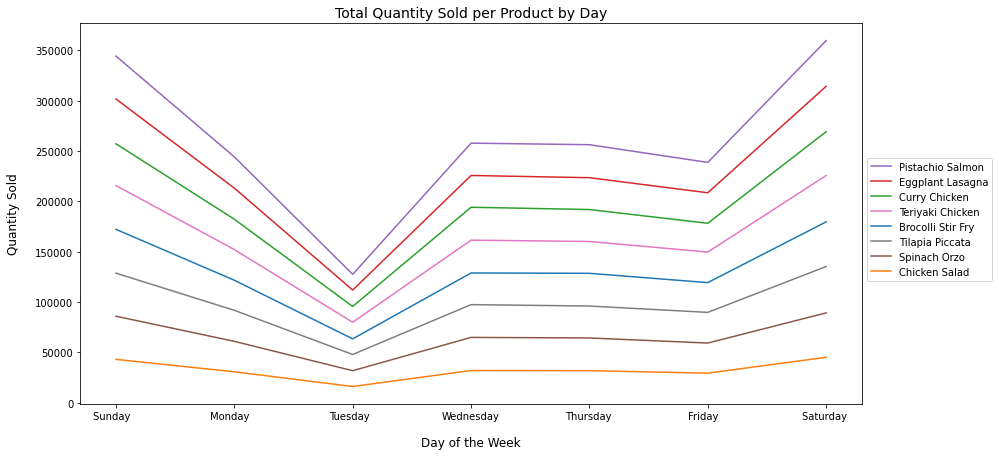

In [33]:
# Store results of below query as df

rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(dow from sa.sale_date) as dow,
       to_char(sa.sale_date, 'Day') as day_of_week,
       p.description as product,
       sum(l.quantity) as total_quantity_sold
from sales as sa
     join line_items as l
         on sa.store_id = l.store_id and sa.sale_id = l.sale_id
     join products as p
         on l.product_id = p.product_id
group by product, dow, day_of_week
order by dow, product

"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

# Plot the results of the query
fig, ax = plt.subplots()
fig = df.groupby(["day_of_week", "product"], sort=False)["total_quantity_sold"].sum().unstack(level=1).plot(figsize=(14,7), ax=ax)

# Change order of legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [4, 3, 2, 6, 0, 7, 5, 1]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], bbox_to_anchor=(1, 0.66), ncol=1)

# Add titles and axes labels
plt.title("Total Quantity Sold per Product by Day", fontsize=14)
ax.set_ylabel("Quantity Sold", labelpad=15, fontsize=12)
ax.set_xlabel("Day of the Week", labelpad=15, fontsize=12);

# The Effect of Holidays on Sales

### Transaction-level Detail, USD

In [43]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sale_date as date,
        total_amount as usd
from sales
order by sale_date

"""

df1 = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df1

,date,usd
0,2020-01-01,96
1,2020-01-01,144
2,2020-01-01,48
3,2020-01-01,24
4,2020-01-01,108
...,...,...
1537612,2020-12-31,60
1537613,2020-12-31,96
1537614,2020-12-31,60
1537615,2020-12-31,12


### Total Meals Sold, by Day

In [44]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sa.sale_date as date,
        sum(l.quantity) as meals_sold
from sales as sa
    join line_items as l
        on sa.store_id = l.store_id and sa.sale_id = l.sale_id
group by date
order by date

"""

df2 = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df2

,date,meals_sold
0,2020-01-01,11148
1,2020-01-02,21760
2,2020-01-03,21923
3,2020-01-04,33364
4,2020-01-05,32916
...,...,...
359,2020-12-27,33008
360,2020-12-28,22071
361,2020-12-29,10870
362,2020-12-30,21952


### Holidays

In [45]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select *
from holidays

"""

df3 = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df3

,holiday_date,description,closed_flag
0,2020-01-01,New Year's Day,False
1,2020-01-20,MLK Day,False
2,2020-02-17,President's Day,False
3,2020-04-12,Easter,False
4,2020-05-10,Mother's Day,False
5,2020-05-25,Memorial Day,False
6,2020-06-21,Father's Day,False
7,2020-07-04,Independence Day,False
8,2020-09-07,Labor Day,False
9,2020-11-11,Veterans Days,False


### Merge Data Frames

In [46]:
# Roll df1 up to daily and set the index as date

df1["date"] = pd.to_datetime(df1["date"])
df1 = pd.DataFrame(df1.groupby("date")["usd"].sum())
df1

# Set the index as date in df2 and df3

df2["date"] = pd.to_datetime(df2["date"])
df3["holiday_date"] = pd.to_datetime(df3["holiday_date"])

df2.set_index("date", inplace=True)
df3.set_index("holiday_date", inplace=True)

# Merge df1 and df2 then df3

df = df1.join(df2)
df = df.join(df3, how="outer")
df

,usd,meals_sold,description,closed_flag
2020-01-01,133776,11148,New Year's Day,False
2020-01-02,261120,21760,NaN,NaN
2020-01-03,263076,21923,NaN,NaN
2020-01-04,400368,33364,NaN,NaN
2020-01-05,394992,32916,NaN,NaN
...,...,...,...,...
2020-12-27,396096,33008,NaN,NaN
2020-12-28,264852,22071,NaN,NaN
2020-12-29,130440,10870,NaN,NaN
2020-12-30,263424,21952,NaN,NaN


### Data Manipulation and Feature Extraction

In [47]:
# Fill NaN for usd and meals_sold (Thanksgiving and Christmas)

df["usd"].fillna(0, inplace=True)
df["meals_sold"].fillna(0, inplace=True)

# Create a new column as a holiday indicator

df["is_holiday"] = np.where(df["description"].isna() == True, 0, 1)

In [48]:
# Create several columns for rolling sums of usd (previous n days)
df["past_2_usd"] = df["usd"].rolling(window = 2).apply(sum)
df["past_3_usd"] = df["usd"].rolling(window = 3).apply(sum)
df["past_4_usd"] = df["usd"].rolling(window = 4).apply(sum)
df["past_5_usd"] = df["usd"].rolling(window = 5).apply(sum)
df["past_6_usd"] = df["usd"].rolling(window = 6).apply(sum)
df["past_7_usd"] = df["usd"].rolling(window = 7).apply(sum)

# Create several columns for rolling sums of meals_sold (previous n days)
df["past_2_meals"] = df["meals_sold"].rolling(window = 2).apply(sum)
df["past_3_meals"] = df["meals_sold"].rolling(window = 3).apply(sum)
df["past_4_meals"] = df["meals_sold"].rolling(window = 4).apply(sum)
df["past_5_meals"] = df["meals_sold"].rolling(window = 5).apply(sum)
df["past_6_meals"] = df["meals_sold"].rolling(window = 6).apply(sum)
df["past_7_meals"] = df["meals_sold"].rolling(window = 7).apply(sum)

# Create several columns for the sums of sales (usd) for next n days
df["next_2_usd"] = df["usd"].rolling(2).sum().shift(-2)
df["next_3_usd"] = df["usd"].rolling(3).sum().shift(-3)
df["next_4_usd"] = df["usd"].rolling(4).sum().shift(-4)
df["next_5_usd"] = df["usd"].rolling(5).sum().shift(-5)
df["next_6_usd"] = df["usd"].rolling(6).sum().shift(-6)
df["next_7_usd"] = df["usd"].rolling(7).sum().shift(-7)

# Create several columns for the sums of meals_sold for next n days
df["next_2_meals"] = df["meals_sold"].rolling(2).sum().shift(-2)
df["next_3_meals"] = df["meals_sold"].rolling(3).sum().shift(-3)
df["next_4_meals"] = df["meals_sold"].rolling(4).sum().shift(-4)
df["next_5_meals"] = df["meals_sold"].rolling(5).sum().shift(-5)
df["next_6_meals"] = df["meals_sold"].rolling(6).sum().shift(-6)
df["next_7_meals"] = df["meals_sold"].rolling(7).sum().shift(-7)

# Holiday Sales Visualizations

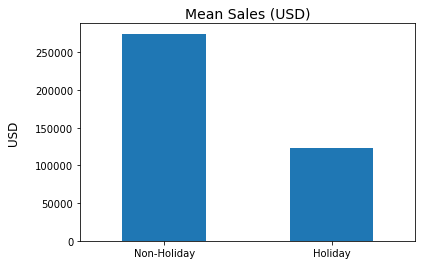

In [49]:
labels = ["Non-Holiday", "Holiday"]
df.groupby("is_holiday")["usd"].mean().plot(kind="bar")
plt.title("Mean Sales (USD)", fontsize=14)
plt.ylabel("USD", fontsize=12, labelpad=15)
plt.xlabel("")
plt.xticks([0, 1], labels, rotation=0);

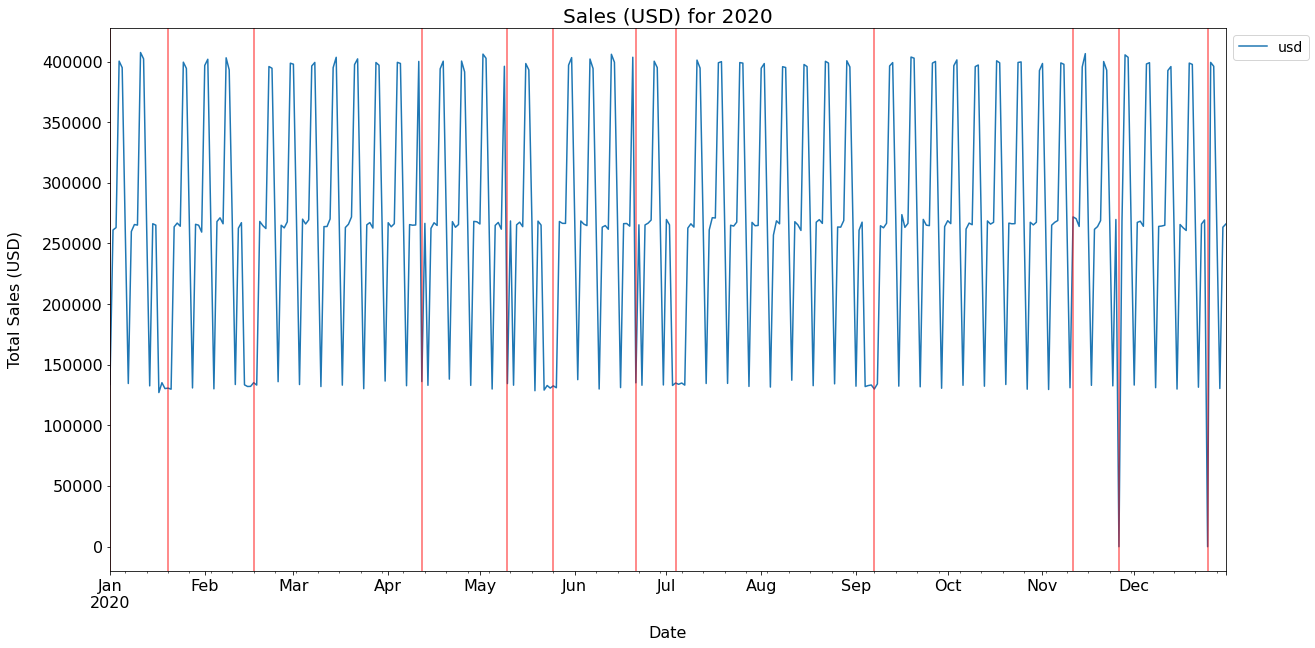

In [52]:
# Generate the plot
fig, ax = plt.subplots()
fig = df.plot(y=["usd"], 
        use_index=True, 
        figsize=(20,10),
       ax=ax)
plt.title("Sales (USD) for 2020", fontsize=20)
ax.set_ylabel("Total Sales (USD)", labelpad=20, fontsize=16)
ax.set_xlabel("Date", labelpad=15, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.legend(bbox_to_anchor=(1, 1), ncol=1, fontsize=14)

# Add vertical lines to indicate holidays
plt.axvline(dt.datetime(2020, 1, 1), color="red", alpha = 0.6)
plt.axvline(dt.datetime(2020, 1, 20), color="red", alpha = 0.6)
plt.axvline(dt.datetime(2020, 2, 17), color="red", alpha = 0.6)
plt.axvline(dt.datetime(2020, 4, 12), color="red", alpha = 0.6)
plt.axvline(dt.datetime(2020, 5, 10), color="red", alpha = 0.6)
plt.axvline(dt.datetime(2020, 5, 25), color="red", alpha = 0.6)
plt.axvline(dt.datetime(2020, 6, 21), color="red", alpha = 0.6)
plt.axvline(dt.datetime(2020, 7, 4), color="red", alpha = 0.6)
plt.axvline(dt.datetime(2020, 9, 7), color="red", alpha = 0.6)
plt.axvline(dt.datetime(2020, 11, 11), color="red", alpha = 0.6)
plt.axvline(dt.datetime(2020, 11, 26), color="red", alpha = 0.6)
plt.axvline(dt.datetime(2020, 12, 25), color="red", alpha = 0.6);

### Sums for Past Days

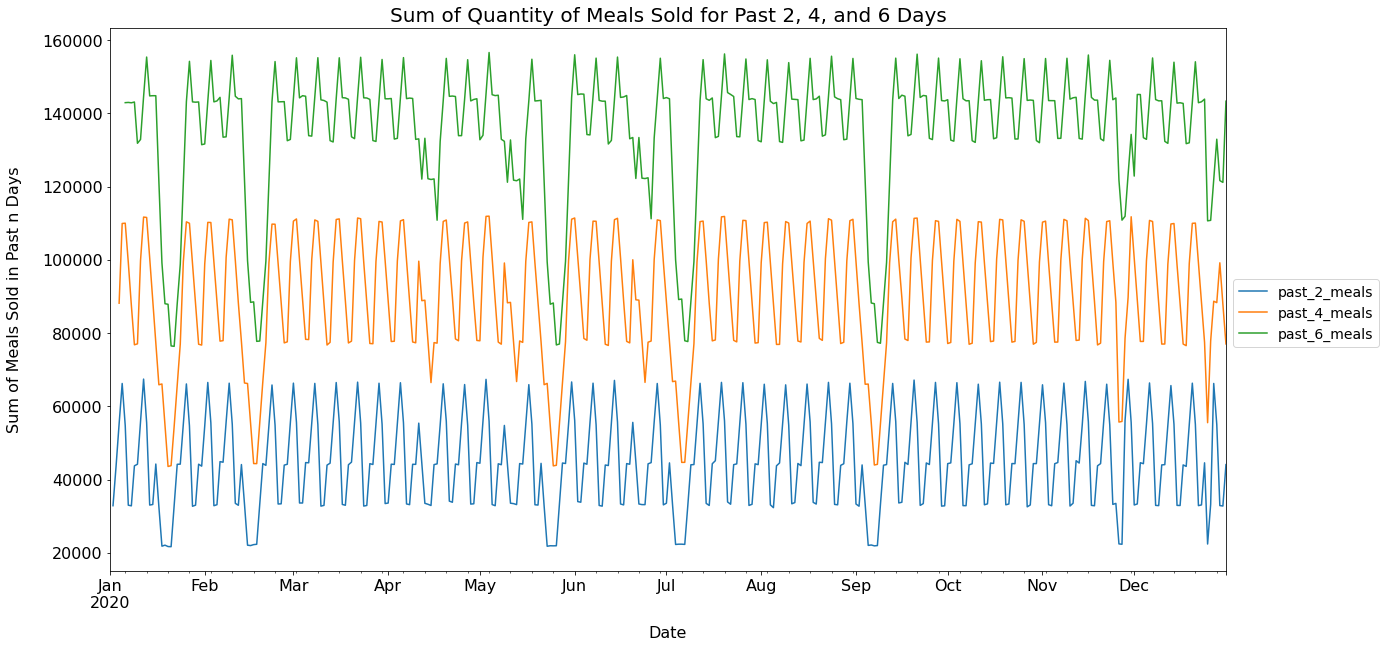

In [53]:
# Generate the plot
fig, ax = plt.subplots()
fig = df.plot(y=["past_2_meals", 
           "past_4_meals",
           "past_6_meals"], 
        use_index=True, 
        figsize=(20,10),
       ax=ax)
plt.title("Sum of Quantity of Meals Sold for Past 2, 4, and 6 Days", fontsize=20)
ax.set_ylabel("Sum of Meals Sold in Past n Days", labelpad=20, fontsize=16)
ax.set_xlabel("Date", labelpad=15, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.legend(bbox_to_anchor=(1, 0.55), ncol=1, fontsize=14);

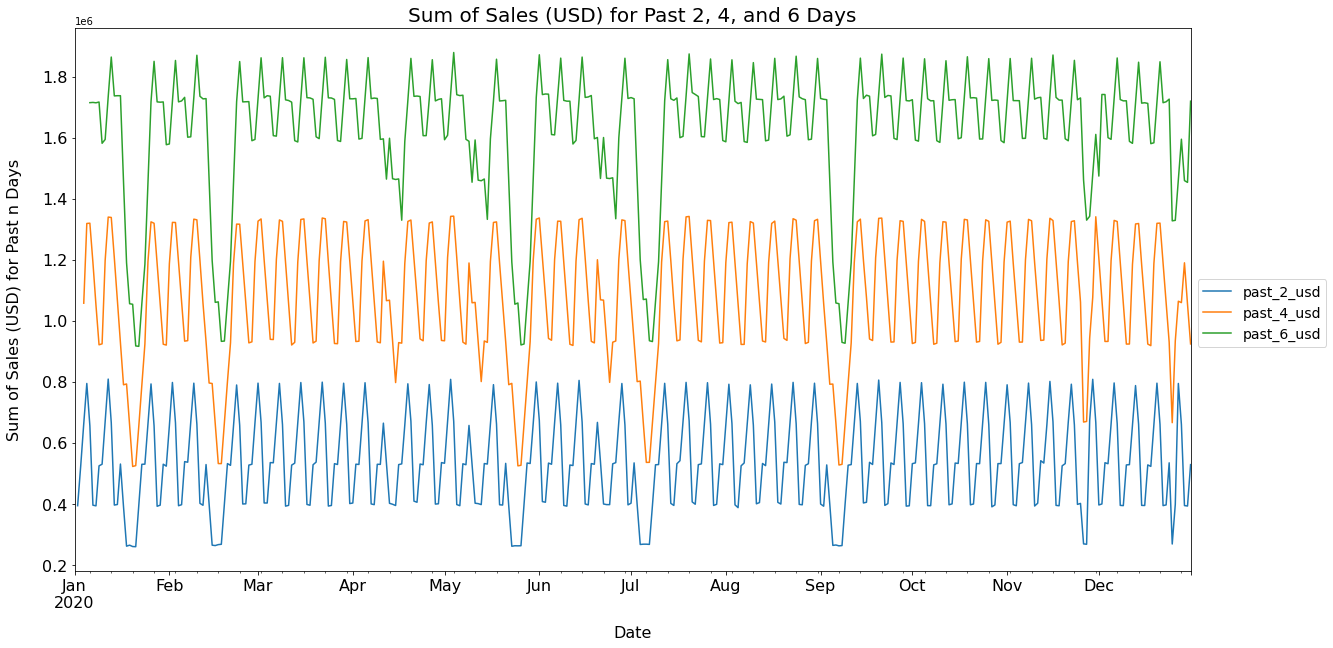

In [54]:
# Generate the plot
fig, ax = plt.subplots()
fig = df.plot(y=["past_2_usd", 
           "past_4_usd",
           "past_6_usd"], 
        use_index=True, 
        figsize=(20,10),
       ax=ax)
plt.title("Sum of Sales (USD) for Past 2, 4, and 6 Days", fontsize=20)
ax.set_ylabel("Sum of Sales (USD) for Past n Days", labelpad=20, fontsize=16)
ax.set_xlabel("Date", labelpad=15, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.legend(bbox_to_anchor=(1, 0.55), ncol=1, fontsize=14);

### Sums for Upcoming Days

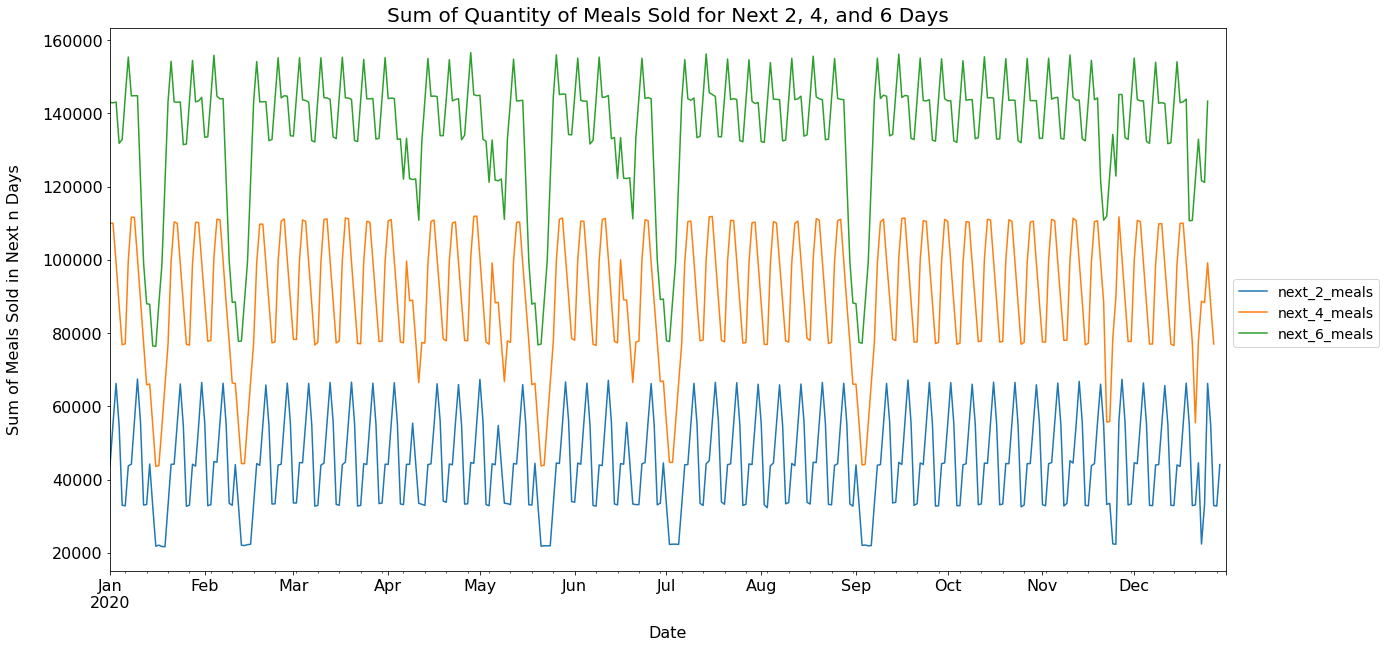

In [55]:
# Generate the plot
fig, ax = plt.subplots()
fig = df.plot(y=["next_2_meals", 
           "next_4_meals",
           "next_6_meals"], 
        use_index=True, 
        figsize=(20,10),
       ax=ax)
plt.title("Sum of Quantity of Meals Sold for Next 2, 4, and 6 Days", fontsize=20)
ax.set_ylabel("Sum of Meals Sold in Next n Days", labelpad=20, fontsize=16)
ax.set_xlabel("Date", labelpad=15, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.legend(bbox_to_anchor=(1, 0.55), ncol=1, fontsize=14);

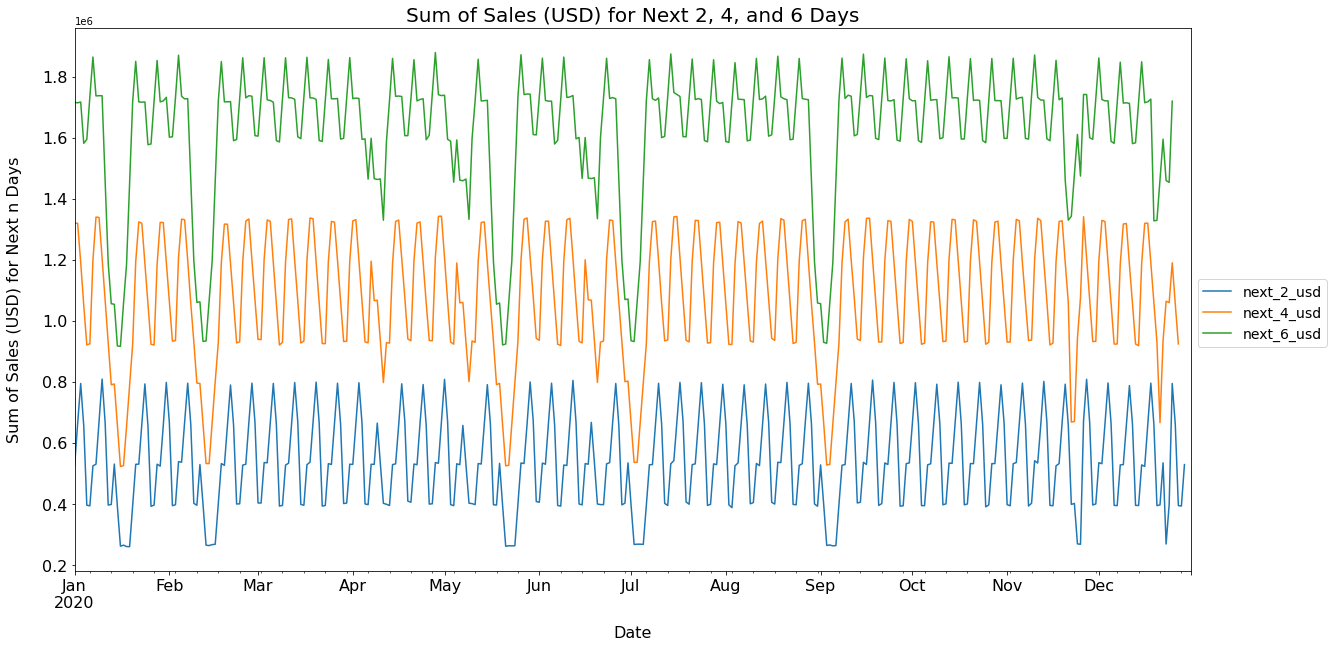

In [56]:
# Generate the plot
fig, ax = plt.subplots()
fig = df.plot(y=["next_2_usd", 
           "next_4_usd",
           "next_6_usd"], 
        use_index=True, 
        figsize=(20,10),
       ax=ax)
plt.title("Sum of Sales (USD) for Next 2, 4, and 6 Days", fontsize=20)
ax.set_ylabel("Sum of Sales (USD) for Next n Days", labelpad=20, fontsize=16)
ax.set_xlabel("Date", labelpad=15, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.legend(bbox_to_anchor=(1, 0.55), ncol=1, fontsize=14);

# Executive Summary

I investigated the extent to which holidays affected sales during 2020. For my analysis, I operationalized "sales" as revenue and quantity sold for all products across all stores. Note that this is not a formal "causal" analysis (i.e., we can't conclude that any dip or spike in sales on holidays is caused by the occurrence of the holiday). That said, we certainly can make observations based on patterns in the data. The holidays I considered are:

* New Year's Day
* MLK Day
* President's Day
* Easter
* Mother's Day
* Memorial Day
* Father's Day
* Independence Day
* Labor Day
* Veterans Days
* Thanksgiving
* Christmas	

Holidays (except for Veteran's Day) appear to have an adverse effect on the number of meals sold and the revenue from sales throughout the year. While these two metrics see regular fluctuations during the year, they show marked decreases in the days leading up to and following holidays. More specifically, the average number of meals sold and revenue from sales on holidays are each less than half of their non-holiday averages. These effects are not due to closure, as our business is only closed on Thanksgiving and Christmas.

Additionally, I analyzed rolling sums for the number of meals sold and revenue from sales for the entire year using a variety of time windows. This allowed me to investigate both of these metrics in the days leading up to and following holidays. In doing so, I determined that the most severe effects on sales come during MLK Day, President's Day, Memorial Day, Independence Day, and Labor Day.

The implications of these findings are as follows:

1. Average sales on holidays are less than 50% of their non-holiday averages, but this varies as a function of which holiday is being considered.
2. Our sales follow an otherwise highly regular (and likely predictable) pattern.
3. Customers' purchasing behavior (with respect to our product) changes several days up to and following holidays.

# Customer Model

In [58]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select c.customer_id,
        c.last_name,
        c.first_name,
        sum(sa.total_amount) as total_spent,
        count(distinct store_id || '-' || sale_id) as total_txns,
        max(sa.sale_date) as last_txn
from customers as c
    left join sales as sa
        on c.customer_id = sa.customer_id
group by c.customer_id, c.last_name, c.first_name
order by total_spent
        

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,customer_id,last_name,first_name,total_spent,total_txns,last_txn
0,6485,Wainwright,Alyce,612,9,2020-12-19
1,22530,Maus,Thomasina,648,14,2020-10-18
2,12861,Leeburne,Kacie,672,14,2020-12-19
3,1528,Cherry,Lorin,684,16,2020-11-21
4,4220,Colnett,Laurel,708,13,2020-12-26
...,...,...,...,...,...,...
31077,30333,Greenhead,Luise,<NA>,0,None
31078,29182,Mouser,Simona,<NA>,0,None
31079,2676,Arnke,Daniella,<NA>,0,None
31080,23653,Rosenstock,Stephine,<NA>,0,None


I would adopt a recency, frequency, and monetary value model to describe our customers. As can be seen from the query above, we have the data required to do so. The model encapsulates customer behaviors which drive business metrics and can be scaled as our business grows.

The RFM model is one of the most widely-used methods to segment an organization's customer base. The "best" customer is one who purchased a product relatively recently, purchases frequently, and spends a relatively high total amount of money with the organization. These customers are ones who could potentially pilot / test new products before they are launched and who ought to serve as the target market for such new products.

New customers are those who have made recent purchases, but their frequency and monetary value are relatively low. These customers ought to be engaged in an effort to drive them to converting into loyal, heavy spenders.

Customers with high frequency and monetary value scores but who haven't recently made purchases are at risk of churning. These customers should be engaged, too, but for the purpose of (a) figuring out why they haven't made a purchase recently and (b) attempting to salvage the customer before they are lost.

Finally, customers who have not recently made a purchase with low frequency and monetary value are already lost. It could be worthwhile to contact them to figure out why they churned, but minimal effort should be invested in them otherwise. 

Since we have the data required to implement a RFM model, we could use an unsupervised learning algorithm (K Means Clustering) to figure out where naturally occurring groups of our customers stand on each of these 3 dimensions. We could then use these clusters/groupings to inform our approach to growing our relationship with them. This model could be reformed / rerun at specific time intervals to reflect changes in our customer base as our business grows.